https://www.kaggle.com/moltean/fruits

In [1]:
import numpy as np
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
IMG_SIZE = 100

TRAINING_DIR = "fruits-360/Training"
training_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = training_datagen.flow_from_directory(TRAINING_DIR, target_size=(IMG_SIZE, IMG_SIZE))

TEST_DIR = "fruits-360/Test"
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(TEST_DIR, target_size=(IMG_SIZE, IMG_SIZE))

x, y = train_generator.next() # x- генератор картинок, y- меток классов(one-hot) 

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


# задействанные фрукты:

In [3]:
train_generator.class_indices

{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Corn': 35,
 'Corn Husk': 36,
 'Cucumber Ripe': 37,
 'Cucumber Ripe 2': 38,
 'Dates': 39,
 'Eggplant': 40,
 'Fig': 41,
 'Ginger Root': 42,
 'Granadilla': 43,
 'Grape Blue': 44,
 'Grape Pink': 45,
 'Grape White': 46,
 'Grape White 2': 47,
 'Grape White 3': 48,
 'Grap

In [4]:
klass_labels = list(train_generator.class_indices.keys())

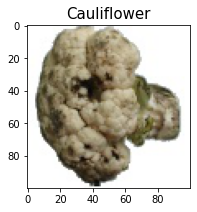

In [34]:
plt.figure(figsize=(3,3))
for i in range(0, 1):
    image = x[i]
    plt.imshow(image)
    plt.title(klass_labels[np.argmax(y[i])], size=15)
    plt.show()

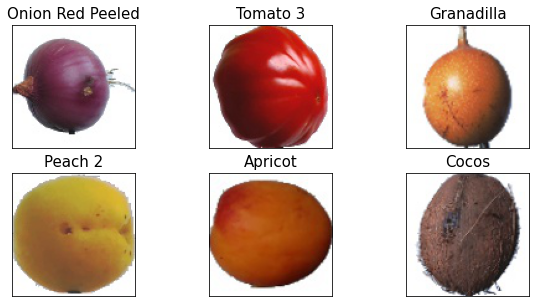

In [6]:
fig = plt.figure(figsize=(10, 5))
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(x[i])
    ax.set_title(klass_labels[np.argmax(y[i])], size=15)

In [7]:
fruits_model = tf.keras.models.load_model('fruits_model.h5')
fruits_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6400)             

## - фото для распознания 

In [8]:
import pathlib
imgdir_path = pathlib.Path('content')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
print(*file_list, sep='\n')

content/1.jpg
content/2.jpg
content/3.jpg
content/4.jpg
content/5.jpg
content/6.jpg


Using TensorFlow backend.


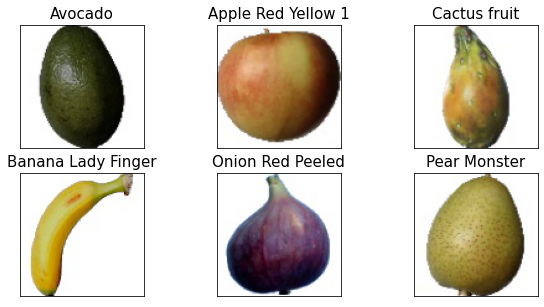

In [9]:
from keras.preprocessing import image

fig = plt.figure(figsize=(10, 5))
for i,path in enumerate(file_list[:6]):
    # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    img = image.load_img(path, target_size=(IMG_SIZE, IMG_SIZE))
    x   = image.img_to_array(img)
    x   = np.expand_dims(x, axis=0)
    images = np.vstack([x])  # при k фото shape= (k, 100, 100, 3)

    pred_classes = fruits_model.predict(images)  # может принимать несколько фото сразу
    klass_label = klass_labels[np.argmax(pred_classes[0])]

    # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(klass_label, size=15)

# Используемая модель:

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),  # 98/2 = 49

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),  # 47/2 = 23

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),  # 21/2 = 10

    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2, 2), #8/2 = 4

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(131, activation='softmax')

])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0

In [11]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
history = model.fit(train_generator, 
                    steps_per_epoch=5, epochs=5, 
                    validation_data=test_generator)

Epoch 1/5
5/5 [==============================] - 78s 16s/step - loss: 0.5873 - accuracy: 0.7937 - val_loss: 0.5619 - val_accuracy: 0.8509
Epoch 2/5
5/5 [==============================] - 78s 16s/step - loss: 0.4801 - accuracy: 0.8313 - val_loss: 0.5490 - val_accuracy: 0.8579
Epoch 3/5
5/5 [==============================] - 75s 15s/step - loss: 0.5344 - accuracy: 0.8313 - val_loss: 0.5293 - val_accuracy: 0.8564
Epoch 4/5
5/5 [==============================] - 76s 15s/step - loss: 0.4677 - accuracy: 0.8375 - val_loss: 0.5309 - val_accuracy: 0.8580
Epoch 5/5
5/5 [==============================] - 72s 14s/step - loss: 0.5508 - accuracy: 0.8313 - val_loss: 0.5011 - val_accuracy: 0.8695


In [12]:
# history = model.fit(train_generator, epochs=10, verbose=10 , validation_data = test_generator )

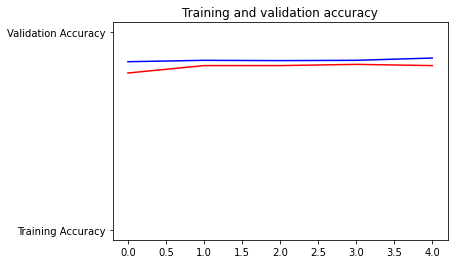

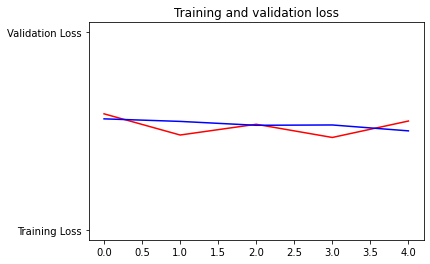

In [33]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

# Получение списка результатов на обучающих и тестовых наборах для каждой обучающей эпохи
acc     = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss    = history.history['loss']
val_loss= history.history['val_loss']

epochs=range(len(acc)) # количество эпох

# Точность обучения и валидации в зависимости от эпох
plt.plot(epochs, acc,     'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

# Точность обучения и валидации в зависимости от эпои
plt.plot(epochs, loss,     'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and validation loss');